#Apple Stock Price Prediction

##Download data

In [ ]:
import numpy as np
import pandas as pd

###Download Apple stock data for 14, 9, and 5-years periods

In [ ]:
import yfinance as yf
df_14 = yf.download('AAPL', start='2010-01-01', end='2024-01-01')
df_9 = yf.download('AAPL', start='2015-01-01', end='2024-01-01')
df_5 = yf.download('AAPL', start='2019-01-01', end='2024-01-01')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
data_14 = df_14[['Close']].copy()
data_9 = df_9[['Close']].copy()
data_5 = df_5[['Close']].copy()

##Preprocessing:Normalization
Scale data using MinMaxScaler to bring values between 0 and 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data_14 = scaler.fit_transform(data_14)
scaled_data_9 = scaler.fit_transform(data_9)
scaled_data_5 = scaler.fit_transform(data_5)


###Split Data into Training and Testing Sets
80% Training data, 20% Testing data

In [ ]:
train_size_14 = int(len(scaled_data_14) * 0.8)
train_size_9 = int(len(scaled_data_9) * 0.8)
train_size_5 = int(len(scaled_data_5) * 0.8)

train_data_14 = scaled_data_14[:train_size_14]
train_data_9 = scaled_data_9[:train_size_9]
train_data_5 = scaled_data_5[:train_size_5]

test_data_14 = scaled_data_14[train_size_14 - 60:]
test_data_9 = scaled_data_9[train_size_9 - 60:]
test_data_5 = scaled_data_5[train_size_5 - 60:]


Function to Create Sequences for LSTM Input

In [ ]:
def create_sequences(data, window_size=60):
    x, y = [], []
    for i in range(window_size, len(data)):
        x.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

x_train_14, y_train_14 = create_sequences(train_data_14)
x_test_14, y_test_14 = create_sequences(test_data_14)

x_train_9, y_train_9 = create_sequences(train_data_9)
x_test_9, y_test_9 = create_sequences(test_data_9)

x_train_5, y_train_5 = create_sequences(train_data_5)
x_test_5, y_test_5 = create_sequences(test_data_5)


Reshape data to 3D for LSTM model


In [ ]:
x_train_14 = x_train_14.reshape(x_train_14.shape[0], x_train_14.shape[1], 1)
x_test_14 = x_test_14.reshape(x_test_14.shape[0], x_test_14.shape[1], 1)

x_train_9 = x_train_9.reshape(x_train_9.shape[0], x_train_9.shape[1], 1)
x_test_9 = x_test_9.reshape(x_test_9.shape[0], x_test_9.shape[1], 1)

x_train_5 = x_train_5.reshape(x_train_5.shape[0], x_train_5.shape[1], 1)
x_test_5 = x_test_5.reshape(x_test_5.shape[0], x_test_5.shape[1], 1)


###Define and Compile LSTM Models


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model_14 = Sequential()
model_14.add(LSTM(50, return_sequences=True, input_shape=(x_train_14.shape[1], 1)))
model_14.add(Dropout(0.2))
model_14.add(LSTM(50, return_sequences=False))
model_14.add(Dropout(0.2))
model_14.add(Dense(25))
model_14.add(Dense(1))  # Output layer for predicting stock prices

model_14.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model_9 = Sequential()
model_9.add(LSTM(50, return_sequences=True, input_shape=(x_train_9.shape[1], 1)))
model_9.add(Dropout(0.2))
model_9.add(LSTM(50, return_sequences=False))
model_9.add(Dropout(0.2))
model_9.add(Dense(25))
model_9.add(Dense(1))

model_9.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model_5 = Sequential()
model_5.add(LSTM(50, return_sequences=True, input_shape=(x_train_5.shape[1], 1)))
model_5.add(Dropout(0.2))
model_5.add(LSTM(50, return_sequences=False))
model_5.add(Dropout(0.2))
model_5.add(Dense(25))
model_5.add(Dense(1))

model_5.compile(optimizer='adam', loss='mean_squared_error')

###Train the Models

In [ ]:
model_14.fit(x_train_14, y_train_14, batch_size=1, epochs=20)


Epoch 1/20
2757/2757 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - loss: 0.0014
Epoch 2/20
2757/2757 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - loss: 7.4616e-04
Epoch 3/20
2757/2757 ━━━━━━━━━━━━━━━━━━━━ 39s 8ms/step - loss: 7.9166e-04
Epoch 4/20
2757/2757 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - loss: 8.7013e-04
Epoch 5/20
2757/2757 ━━━━━━━━━━━━━━━━━━━━ 39s 7ms/step - loss: 6.9334e-04
Epoch 6/20
2757/2757 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - loss: 6.4098e-04
Epoch 7/20
2757/2757 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - loss: 4.7685e-04
Epoch 8/20
2757/2757 ━━━━━━━━━━━━━━━━━━━━ 39s 8ms/step - loss: 4.5891e-04
Epoch 9/20
2757/2757 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - loss: 5.3472e-04
Epoch 10/20
2757/2757 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 4.6160e-04
Epoch 11/20
2757/2757 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - loss: 4.4604e-04
Epoch 12/20
2757/2757 ━━━━━━━━━━━━━━━━━━━━ 43s 9ms/step - loss: 4.4706e-04
Epoch 13/20
2757/2757 ━━━━━━━━━━━━━━━━━━━━ 37s 8ms/step - loss: 4.8522e-04
Epoch 14/20
2757/2757 ━━━━━━━━━━━━━━━━

In [ ]:
model_9.fit(x_train_9, y_train_9, batch_size=1, epochs=20)


Epoch 1/20
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.0044
Epoch 2/20
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 0.0016
Epoch 3/20
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 0.0015
Epoch 4/20
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 0.0016
Epoch 5/20
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 0.0017
Epoch 6/20
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 0.0013
Epoch 7/20
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 0.0013
Epoch 8/20
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 0.0013
Epoch 9/20
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 0.0011
Epoch 10/20
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 0.0012
Epoch 11/20
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 0.0012
Epoch 12/20
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.0013
Epoch 13/20
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 0.0012
Epoch 14/20
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 0.0010
Epoch 15/20
175

In [ ]:
model_5.fit(x_train_5, y_train_5, batch_size=1, epochs=20)


Epoch 1/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0128
Epoch 2/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0027
Epoch 3/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0026
Epoch 4/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0021
Epoch 5/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0021
Epoch 6/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0018
Epoch 7/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0019
Epoch 8/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0015
Epoch 9/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0018
Epoch 10/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0013
Epoch 11/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0020
Epoch 12/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0015
Epoch 13/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0013
Epoch 14/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0018
Epoch 15/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step 

###Make Predictions
Inverse transform the predictions back to the original price scale

In [ ]:
predictions_14 = model_14.predict(x_test_14)
predictions_14 = scaler.inverse_transform(predictions_14)
y_test_14_actual = scaler.inverse_transform(y_test_14.reshape(-1, 1))

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
predictions_9 = model_9.predict(x_test_9)
predictions_9 = scaler.inverse_transform(predictions_9)
y_test_9_actual = scaler.inverse_transform(y_test_9.reshape(-1, 1))

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [ ]:
predictions_5 = model_5.predict(x_test_5)
predictions_5 = scaler.inverse_transform(predictions_5)
y_test_5_actual = scaler.inverse_transform(y_test_5.reshape(-1, 1))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


##Evaluate the Model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

def get_metrics_value(y_train, y_test, predictions_train, predictions_test):
    mae_test = mean_absolute_error(y_test, predictions_test)
    mse_test = mean_squared_error(y_test, predictions_test)
    rmse_test = np.sqrt(mse_test)

    print(f"MAE: {mae_test:.4f}, MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}")


In [ ]:
print("Model 14 Years:")
get_metrics_value(y_train_14, y_test_14_actual, predictions_14, predictions_14)

Model 14 Years:
MAE: 4.9935, MSE: 41.5971, RMSE: 6.4496


In [ ]:
print("Model 9 Years:")
get_metrics_value(y_train_9, y_test_9_actual, predictions_9, predictions_9)

Model 9 Years:
MAE: 9.4893, MSE: 99.3207, RMSE: 9.9660


In [ ]:
print("Model 5 Years:")
get_metrics_value(y_train_5, y_test_5_actual, predictions_5, predictions_5)

Model 5 Years:
MAE: 1.8279, MSE: 5.4761, RMSE: 2.3401


##Plotting the Predictions vs. Actual Prices

<ipython-input-46-efc19ab86025>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_14['Predictions_14'] = predictions_14


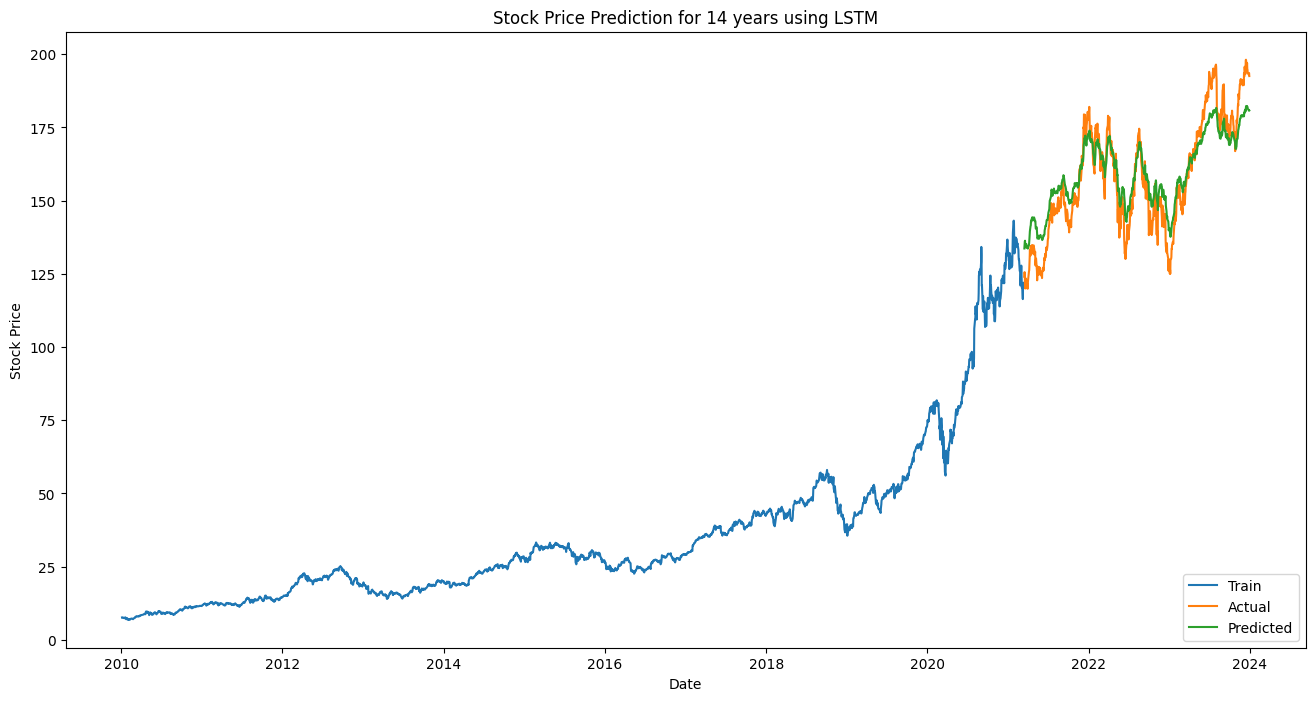

In [ ]:
import matplotlib.pyplot as plt

train_14 = data_14[:train_size_14]
valid_14 = data_14[train_size_14:]
valid_14['Predictions_14'] = predictions_14

plt.figure(figsize=(16, 8))
plt.title('Stock Price Prediction for 14 years using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.plot(train_14['Close'])
plt.plot(valid_14[['Close', 'Predictions_14']])
plt.legend(['Train', 'Actual', 'Predicted'], loc='lower right')
plt.show()


<ipython-input-47-0dfa40bcbd40>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_9['Predictions_9'] = predictions_9


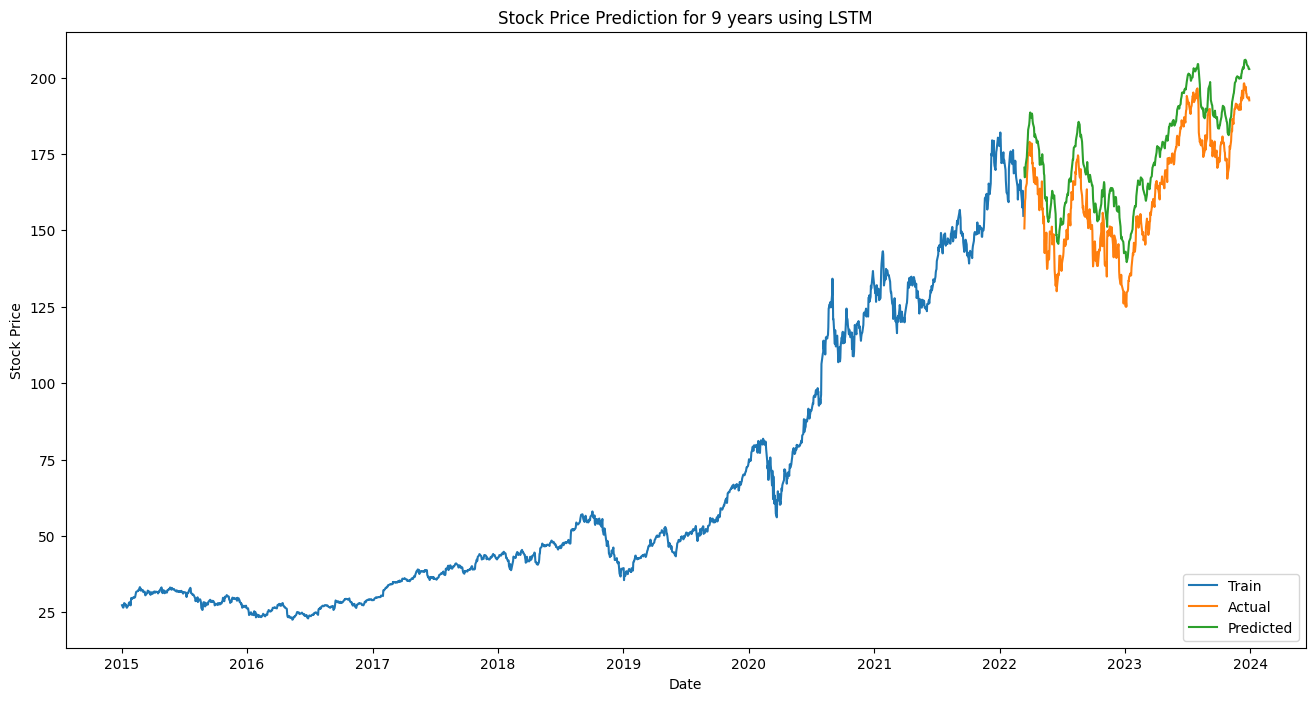

In [ ]:
train_9 = data_9[:train_size_9]
valid_9 = data_9[train_size_9:]
valid_9['Predictions_9'] = predictions_9

plt.figure(figsize=(16, 8))
plt.title('Stock Price Prediction for 9 years using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.plot(train_9['Close'])
plt.plot(valid_9[['Close', 'Predictions_9']])
plt.legend(['Train', 'Actual', 'Predicted'], loc='lower right')
plt.show()


<ipython-input-48-6dca1da69d49>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_5['Predictions_5'] = predictions_5


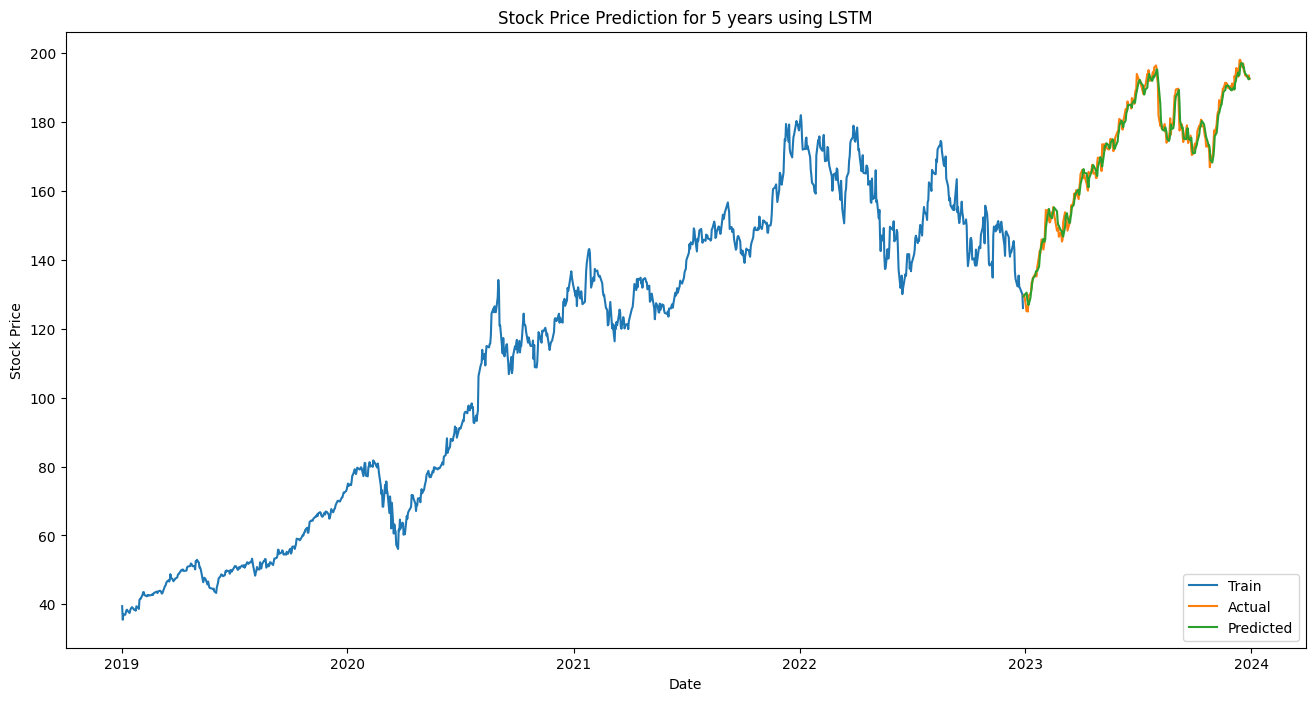

In [ ]:
train_5 = data_5[:train_size_5]
valid_5 = data_5[train_size_5:]
valid_5['Predictions_5'] = predictions_5

plt.figure(figsize=(16, 8))
plt.title('Stock Price Prediction for 5 years using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.plot(train_5['Close'])
plt.plot(valid_5[['Close', 'Predictions_5']])
plt.legend(['Train', 'Actual', 'Predicted'], loc='lower right')
plt.show()


###Compare 3 machines for recent 1 year

*   List item
*   List item



In [ ]:
df_1 = yf.download('AAPL', start='2023-01-01', end='2024-01-01')
data_1 = df_1[['Close']].copy()

[*********************100%***********************]  1 of 1 completed


In [ ]:
scaled_data_recent_1_year = scaler.transform(data_1)
x_test_1_year, y_test_1_year = create_sequences(scaled_data_recent_1_year)
x_test_1_year = x_test_1_year.reshape(x_test_1_year.shape[0], x_test_1_year.shape[1], 1)


In [ ]:
predictions_14_1_year = model_14.predict(x_test_1_year)
predictions_9_1_year = model_9.predict(x_test_1_year)
predictions_5_1_year = model_5.predict(x_test_1_year)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [ ]:
predictions_14_1_year = scaler.inverse_transform(predictions_14_1_year)
predictions_9_1_year = scaler.inverse_transform(predictions_9_1_year)
predictions_5_1_year = scaler.inverse_transform(predictions_5_1_year)
y_test_1_year_actual = scaler.inverse_transform(y_test_1_year.reshape(-1, 1))


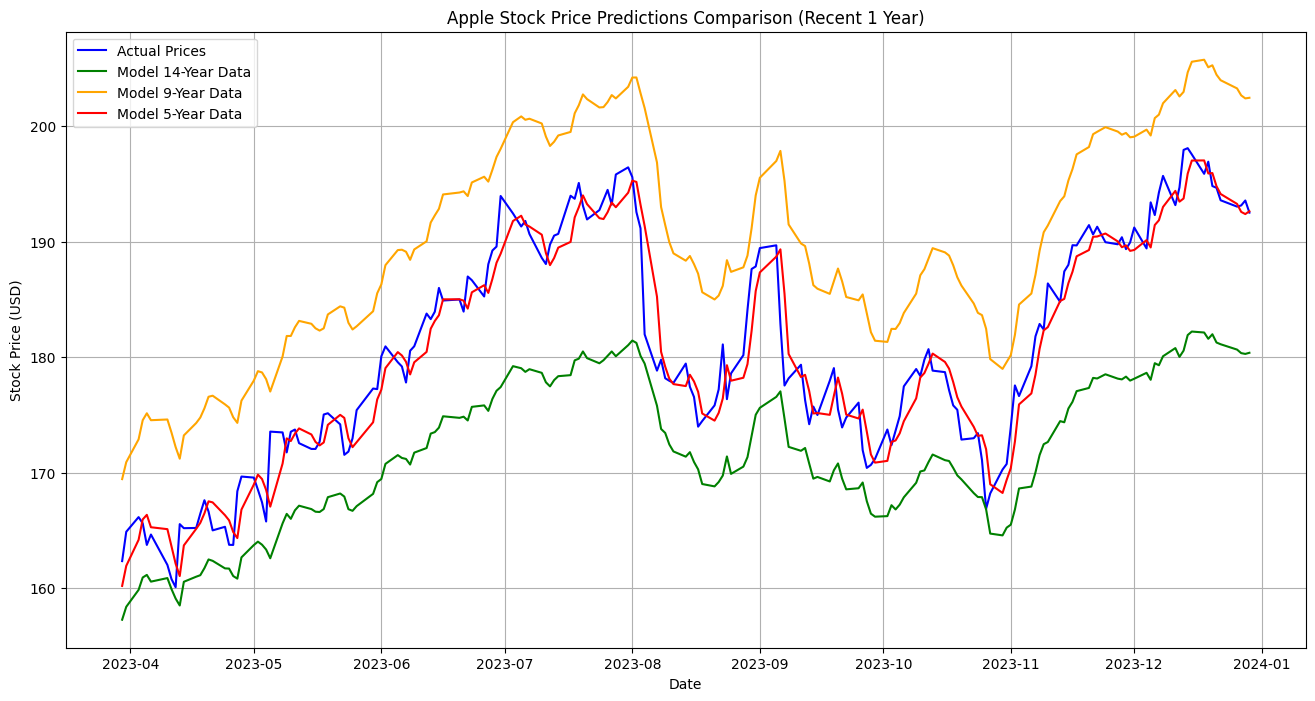

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(data_1.index[-len(y_test_1_year_actual):], y_test_1_year_actual, label='Actual Prices', color='blue')

plt.plot(data_1.index[-len(y_test_1_year_actual):], predictions_14_1_year, label='Model 14-Year Data', color='green')
plt.plot(data_1.index[-len(y_test_1_year_actual):], predictions_9_1_year, label='Model 9-Year Data', color='orange')
plt.plot(data_1.index[-len(y_test_1_year_actual):], predictions_5_1_year, label='Model 5-Year Data', color='red')

plt.title('Apple Stock Price Predictions Comparison (Recent 1 Year)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.show()